# The Backpropogation Algorithm

In this handson lecture we will implement a 3-layer neural network from scratch.

Note: this example is adapted from [this blog post](http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/) and [notebook](https://github.com/dennybritz/nn-from-scratch/blob/master/nn-from-scratch.ipynb) to make it easier to work through without seeing the solution. It is well worth reading through the original post and notebook as well, but we advise you avoid peeking during this class exercise!

<img src="https://github.com/dennybritz/nn-from-scratch/raw/c2c60a6e1e2d06856e908f6ad9e43b94c3a01957/nn-3-layer-network.png" width=60%>

In [1]:
# Package imports
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib

# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

## A dataset to fit

Let's start with a 2-d dataset with two classes with a non-linear decision boundary.

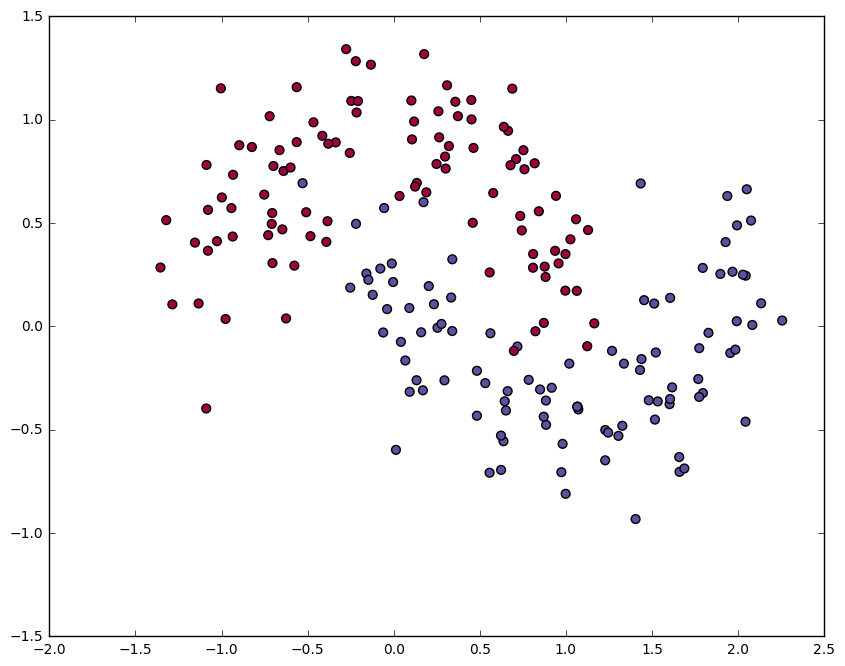

In [2]:
# Generate a dataset and plot it
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [3]:
num_examples = len(X) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality

# Gradient descent parameters (I picked these by hand)
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength

## Mapping math to code

Let's implement functions for different pieces of the puzzle for backprop. We'll hold our model in a dictionary with the following keys:

- W1: the weights of our input layer
- b1: the bias vector for our input layer
- W2: the weights of our hidden layer
- b2: the bias vector of our hidden layer

Note: the methods below reference the dataset variables `X` and `y` directly as free parameters (global to this notebook).

### Forward propogation

We'll use `tanh` as our activation function and implement the forward propogation as intermediate steps within our code as follows:

$$ z_1 = xW_1 + b_1 \\\
a_1 = \text{tanh}(z_1) \\\
z_2 = a_1W_2 + b_2 \\\
a_2 = \hat{y} = \text{softmax}(z_2)
$$

In [4]:
# Helper function to predict an output (0 or 1)
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)


In [5]:
# Helper function to evaluate the total loss on the dataset
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # Calculating the loss
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    # Add regulatization term to loss (optional)
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss

### Backwards propogation

The loss function is $$L(y, \hat{y}) = -\frac{1}{N}\sum_{n\in N}\sum_{i\in C}y_{n, i}\log \hat{y}_{n, i}$$.

To train the parameters of our network, we'll need to use backprop to compute the following gradients at each step:

$$
\delta_3 = y - \hat{y} \\\
\delta_2 = (1 - \tanh^2 z_1)\delta_3 W_2^T \\\
\frac{\partial L}{\partial w_2} = a_1^T \delta_3 \\\
\frac{\partial L}{\partial b_2} = \delta_3 \\\
\frac{\partial L}{\partial W_1} = x^T \delta_2 \\\
\frac{\partial L}{\partial b_1} = \delta2
$$

The code below builds a model and trains it. We've left out the backpropogation part for you to fill in.

Hints:
- We provide $\delta_3$ which makes use of the result of forward propogation.
- $\delta_2$ can make use of `a1` which already computes $\tanh z_1$


In [6]:
# This function learns parameters for the neural network and returns the model.
# - nn_hdim: Number of nodes in the hidden layer
# - num_passes: Number of passes through the training data for gradient descent
# - print_loss: If True, print the loss every 1000 iterations
def build_model(nn_hdim, num_passes=20000, print_loss=False):
    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))

    # This is what we return at the end
    model = {}

    # Gradient descent. For each batch...
    for i in range(0, num_passes):

        # Forward propagation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        
        # update the code below to compute dW2, db2, delta2, dW1 and db1
        dW2 = 0
        db2 = 0
        delta2 = 0 
        dW1 = 0 
        db1 = 0 

        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1

        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2

        # Assign new parameters to the model
        model = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}

        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if print_loss and i % 1000 == 0:
            print("Loss after iteration %i: %f" % (i, calculate_loss(model)))

    return model


### Building the network

Now we build the network and plot the decision boundary.

If your implementation is correct, you should see the loss decrease and the decision boundary should fit the data roughly like so:

<img src="decision-boundary-sol.png">

In [7]:
# Build a model with a 3-dimensional hidden layer
model = build_model(3, num_passes=8000, print_loss=True)



Loss after iteration 0: 0.583953
Loss after iteration 1000: 0.596599
Loss after iteration 2000: 0.608673
Loss after iteration 3000: 0.619947
Loss after iteration 4000: 0.630269
Loss after iteration 5000: 0.639559
Loss after iteration 6000: 0.647793
Loss after iteration 7000: 0.654996


In [8]:
# Helper function to plot a decision boundary.
# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

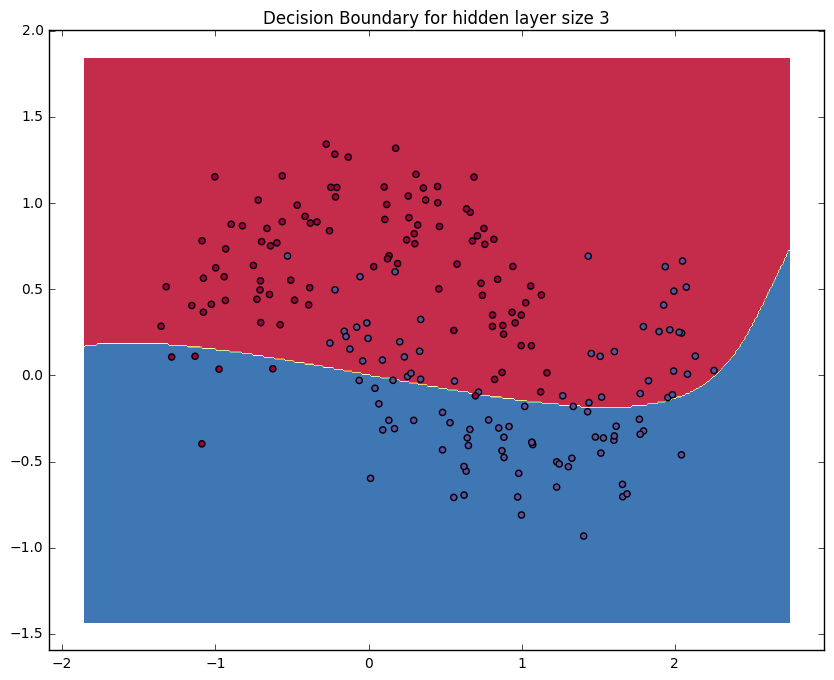

In [9]:
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")